# Problem Set 4

In [56]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [57]:
# Constants
h = 0.72
H0 = 100 * h 
c = 2.998e5 # km/s

In [58]:
# Functions
def H_z(z, Omega_k, Omega_m, Omega_r, Omega_DE, w):
    H_z = H0 * np.sqrt( Omega_k * (1 + z)**2 + Omega_m * (1 + z)**3 + Omega_r * (1 + z)**4 + Omega_DE * (1 + z)**(3 * (1 + w)) )
    return H_z

def D_z(z, Omega_k, Omega_m, Omega_r, Omega_DE, w):
    def integrand(z_prime):
        return c / H_z(z_prime, Omega_k, Omega_m, Omega_r, Omega_DE, w)
    
    integral, error = quad(integrand, 0, z)
    return integral

def D_A(z, Omega_k, Omega_m, Omega_r, Omega_DE, w):
    D_A = D_z(z, Omega_k, Omega_m, Omega_r, Omega_DE, w) / (1 + z)
    return D_A

def D_L(z, Omega_k, Omega_m, Omega_r, Omega_DE, w):
    D_L = D_z(z, Omega_k, Omega_m, Omega_r, Omega_DE, w) * (1 + z)
    return D_L

In [59]:
# Analytical solutions to D_z, D_A and D_L
def analytical(z, args, comp_name):
    Omega_k = args[0]
    Omega_m = args[1]
    Omega_r = args[2]
    Omega_DE = args[3]
    if comp_name == 'Matter':
        D_z = ( 2 * c / (H0 * np.sqrt(Omega_m)) ) * ( 1 - 1 / np.sqrt(1 + z) )
    if comp_name == 'Radiation':
        D_z = ( c / (H0 * np.sqrt(Omega_r)) ) * ( z / (1+z) )
    if comp_name == 'Dark Energy':
        D_z = c * z / (H0 * np.sqrt(Omega_DE))
    if comp_name == 'Curvature':
        D_z = c * np.log(1 + z) / (H0 * np.sqrt(Omega_k))
    D_A = D_z / (1 + z)
    D_L = D_z * (1 + z)
    return D_z, D_A, D_L

## a)

In [60]:
# Components
single_components = {
    'Curvature': {'Omega_k': 1, 'Omega_m': 0, 'Omega_r': 0, 'Omega_DE': 0, 'w': 0},
    'Matter': {'Omega_k': 0, 'Omega_m': 1, 'Omega_r': 0, 'Omega_DE': 0, 'w': 0},
    'Radiation': {'Omega_k': 0, 'Omega_m': 0, 'Omega_r': 1, 'Omega_DE': 0, 'w': 0},
    'Dark Energy': {'Omega_k': 0, 'Omega_m': 0, 'Omega_r': 0, 'Omega_DE': 1, 'w': -1},
}

In [61]:
# Redshift
z_vals = np.linspace(0, 1000, 10000)

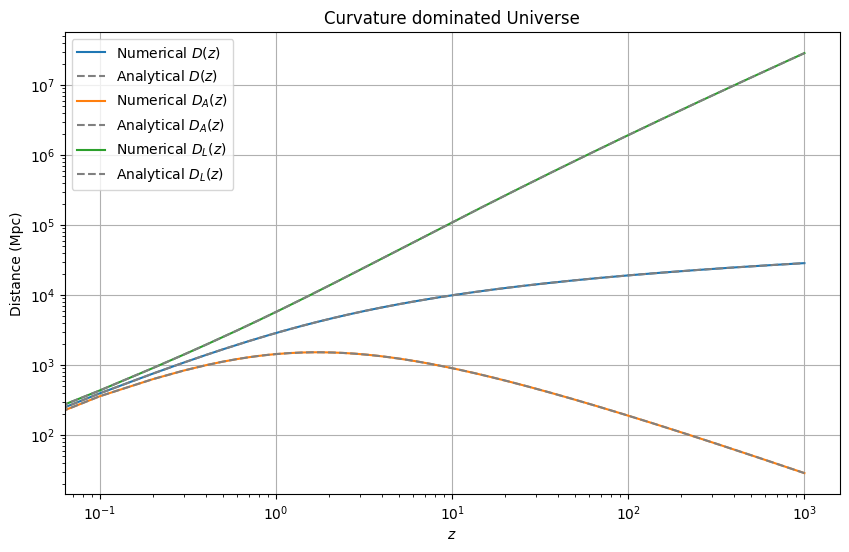

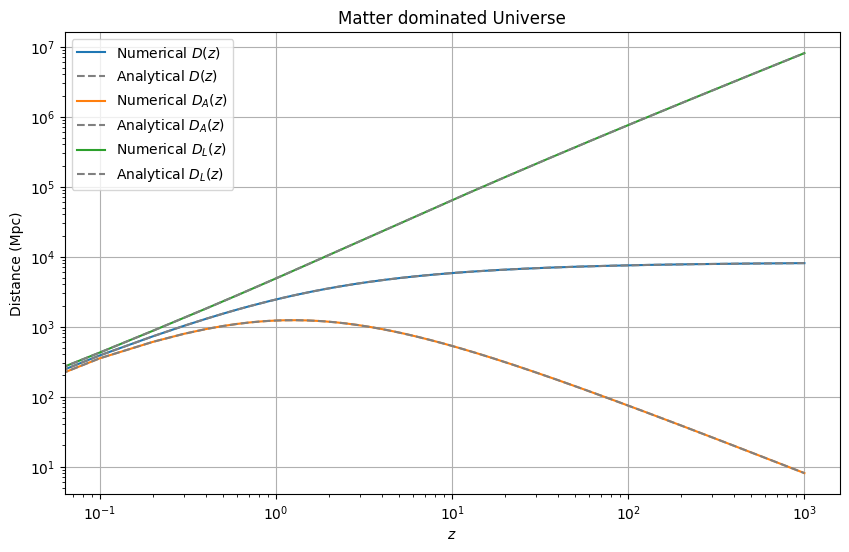

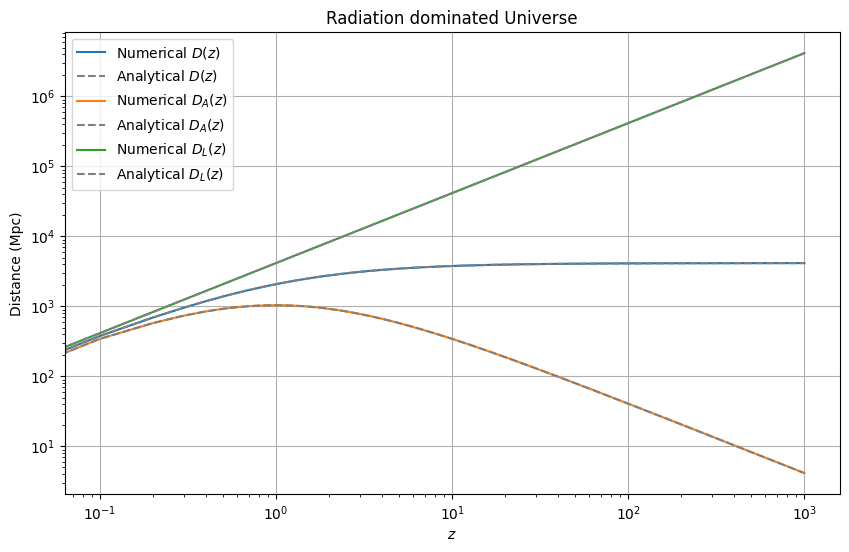

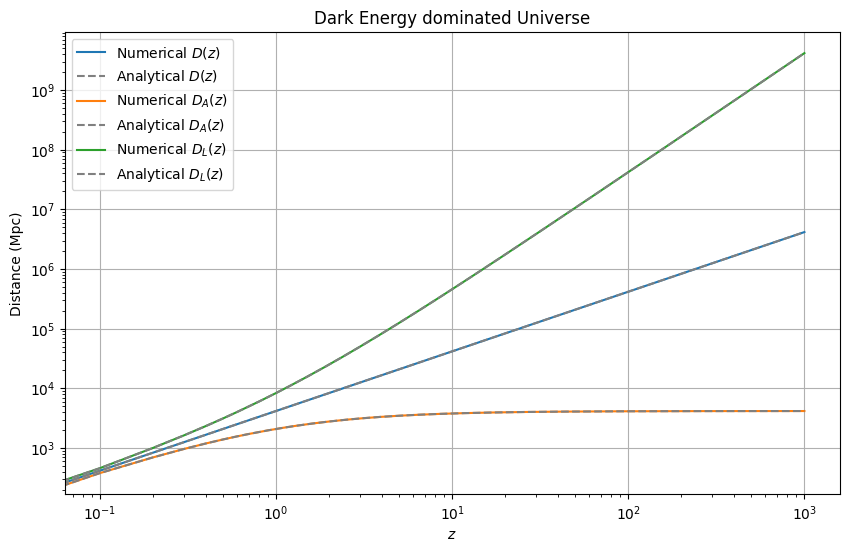

In [62]:
# Solutions and plots
for comp_name, params in single_components.items():
    args = tuple(params.values())

    num_D_z = [D_z(z, args[0], args[1], args[2], args[3], args[4]) for z in z_vals]
    num_D_A = [D_A(z, args[0], args[1], args[2], args[3], args[4]) for z in z_vals]
    num_D_L = [D_L(z, args[0], args[1], args[2], args[3], args[4]) for z in z_vals]

    anal_D_z, anal_D_A, anal_D_L = analytical(z_vals, args=args, comp_name=comp_name)

    plt.figure(figsize=(10,6))
    plt.loglog(z_vals, num_D_z, label='Numerical $D(z)$')
    plt.loglog(z_vals, anal_D_z, c='grey', ls='--', label='Analytical $D(z)$')
    plt.loglog(z_vals, num_D_A, label='Numerical $D_A(z)$')
    plt.loglog(z_vals, anal_D_A, c='grey', ls='--', label='Analytical $D_A(z)$')
    plt.loglog(z_vals, num_D_L, label='Numerical $D_L(z)$')
    plt.loglog(z_vals, anal_D_L, c='grey', ls='--', label='Analytical $D_L(z)$')
    plt.xlabel(r'$z$')
    plt.ylabel('Distance (Mpc)')
    plt.title(f'{comp_name} dominated Universe')
    plt.grid(True)
    plt.legend()

    plt.savefig(f'{comp_name}.png', dpi=240)

    plt.show()

## b)

In [63]:
# Components
two_components = {
    'Matter+Curvature': {'Omega_k': -0.5, 'Omega_m': 1.3, 'Omega_r': 0, 'Omega_DE': 0, 'w': 0},
    'Matter+Dark Energy': {'Omega_k': 0, 'Omega_m': 1.3, 'Omega_r': 0, 'Omega_DE': 1.3, 'w': -1},
}

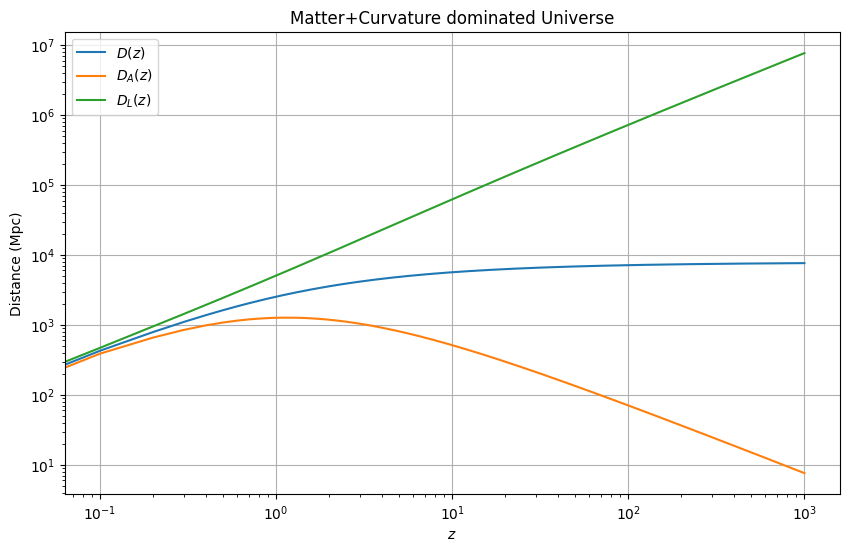

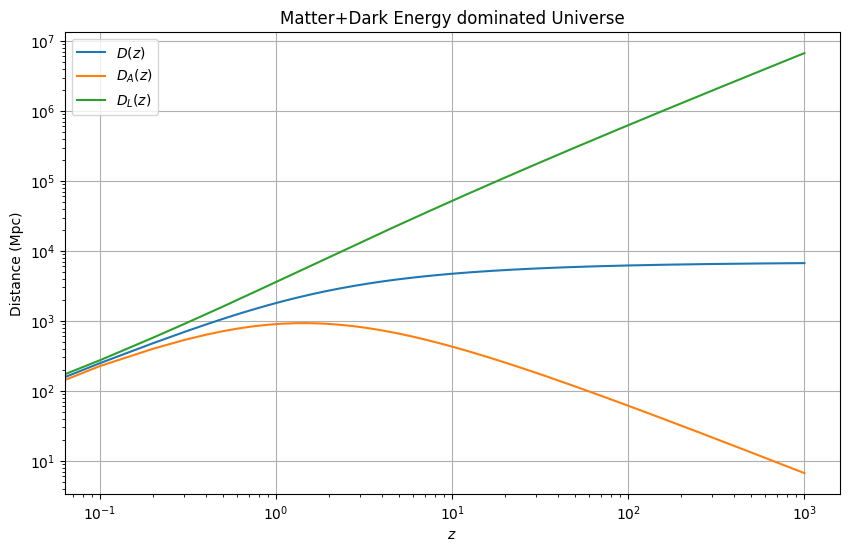

In [64]:
# Solutions and plots
for comp_name, params in two_components.items():
    args = tuple(params.values())

    num_D_z = [D_z(z, args[0], args[1], args[2], args[3], args[4]) for z in z_vals]
    num_D_A = [D_A(z, args[0], args[1], args[2], args[3], args[4]) for z in z_vals]
    num_D_L = [D_L(z, args[0], args[1], args[2], args[3], args[4]) for z in z_vals]

    plt.figure(figsize=(10,6))
    plt.loglog(z_vals, num_D_z, label='$D(z)$')
    plt.loglog(z_vals, num_D_A, label='$D_A(z)$')
    plt.loglog(z_vals, num_D_L, label='$D_L(z)$')
    plt.xlabel(r'$z$')
    plt.ylabel('Distance (Mpc)')
    plt.title(f'{comp_name} dominated Universe')
    plt.grid(True)
    plt.legend()

    plt.savefig(f'{comp_name}.png', dpi=240)

    plt.show()

## c)

In [65]:
# Components
c_components = {
    'All': {'Omega_k': 0, 'Omega_m': 0.25, 'Omega_r': 8.2e-5, 'Omega_DE': 0.75, 'w': -1},
    'Fixed Omega_m = 0.10': {'Omega_k': 1, 'Omega_m': 0.1, 'Omega_r': 8.2e-5, 'Omega_DE': 1.3, 'w': -1},
    'Fixed Omega_m = 0.25': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 8.2e-5, 'Omega_DE': 1.3, 'w': -1},
    'Fixed Omega_m = 0.50': {'Omega_k': 1, 'Omega_m': 0.5, 'Omega_r': 8.2e-5, 'Omega_DE': 1.3, 'w': -1},
    'Fixed Omega_m = 1.00': {'Omega_k': 1, 'Omega_m': 1, 'Omega_r': 8.2e-5, 'Omega_DE': 1.3, 'w': -1},
    'Fixed Omega_DE = 0.50': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 8.2e-5, 'Omega_DE': 0.5, 'w': -1},
    'Fixed Omega_DE = 0.75': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 8.2e-5, 'Omega_DE': 0.75, 'w': -1},
    'Fixed Omega_DE = 1.00': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 8.2e-5, 'Omega_DE': 1, 'w': -1},
    'Fixed w = -0.80': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 8.2e-5, 'Omega_DE': 1.3, 'w': -0.8},
    'Fixed w = -1.00': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 8.2e-5, 'Omega_DE': 1.3, 'w': -1},
    'Fixed w = -1.20': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 8.2e-5, 'Omega_DE': 1.3, 'w': -1.2},
    'Fixed Omega_r = 6e-5': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 6e-5, 'Omega_DE': 1.3, 'w': -1},
    'Fixed Omega_r = 8e-5': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 8e-5, 'Omega_DE': 1.3, 'w': -1},
    'Fixed Omega_r = 10e-5': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 10e-5, 'Omega_DE': 1.3, 'w': -1},
    'Flat Universe (Omega_m, Omega_DE) = (0.00, 1.00)': {'Omega_k': 0, 'Omega_m': 0, 'Omega_r': 8.2e-5, 'Omega_DE': 1, 'w': -1},
    'Flat Universe (Omega_m, Omega_DE) = (0.10, 0.90)': {'Omega_k': 0, 'Omega_m': 0.1, 'Omega_r': 8.2e-5, 'Omega_DE': 0.9, 'w': -1},
    'Flat Universe (Omega_m, Omega_DE) = (0.25, 0.75)': {'Omega_k': 0, 'Omega_m': 0.25, 'Omega_r': 8.2e-5, 'Omega_DE': 0.75, 'w': -1},
    'Flat Universe (Omega_m, Omega_DE) = (0.75, 0.25)': {'Omega_k': 0, 'Omega_m': 0.75, 'Omega_r': 8.2e-5, 'Omega_DE': 0.25, 'w': -1},
    'Flat Universe (Omega_m, Omega_DE) = (1.00, 0.00)': {'Omega_k': 0, 'Omega_m': 1, 'Omega_r': 8.2e-5, 'Omega_DE': 0, 'w': -1},
}

for comp_name, params in c_components.items():
    if 'Fixed' in comp_name:
        c_components[comp_name]['Omega_k'] -= c_components[comp_name]['Omega_m'] + c_components[comp_name]['Omega_r'] + c_components[comp_name]['Omega_DE']

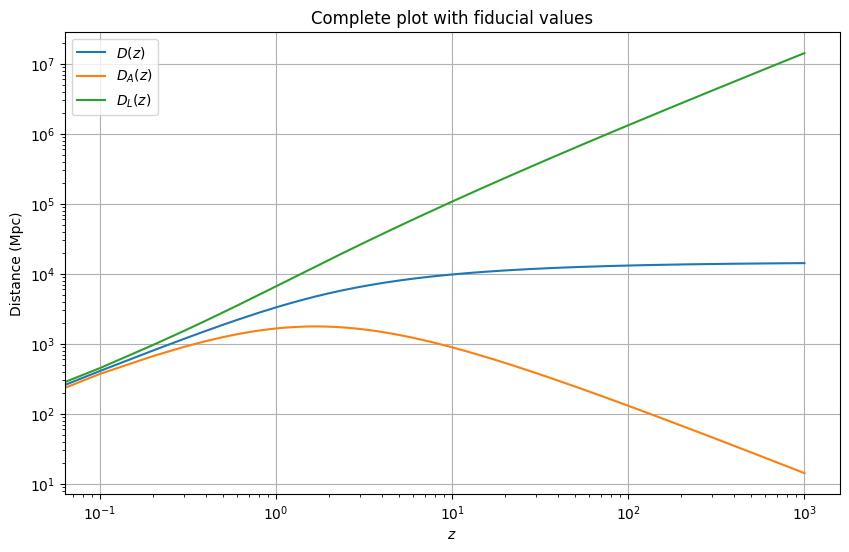

In [66]:
# Solutions and plots for complete fiducial values
plt.figure(figsize=(10,6))

for comp_name, params in c_components.items():
    if 'All' in comp_name:
        args = tuple(params.values())
        num_D_z = [D_z(z, args[0], args[1], args[2], args[3], args[4]) for z in z_vals]
        num_D_A = [D_A(z, args[0], args[1], args[2], args[3], args[4]) for z in z_vals]
        num_D_L = [D_L(z, args[0], args[1], args[2], args[3], args[4]) for z in z_vals]

        plt.loglog(z_vals, num_D_z, label='$D(z)$')
        plt.loglog(z_vals, num_D_A, label='$D_A(z)$')
        plt.loglog(z_vals, num_D_L, label='$D_L(z)$')
        plt.xlabel(r'$z$')
        plt.ylabel('Distance (Mpc)')
        plt.title('Complete plot with fiducial values')
        plt.grid(True)
        plt.legend()

        plt.savefig('all.png', dpi=240)

        plt.show()

        break

### Fixed $\Omega_m$

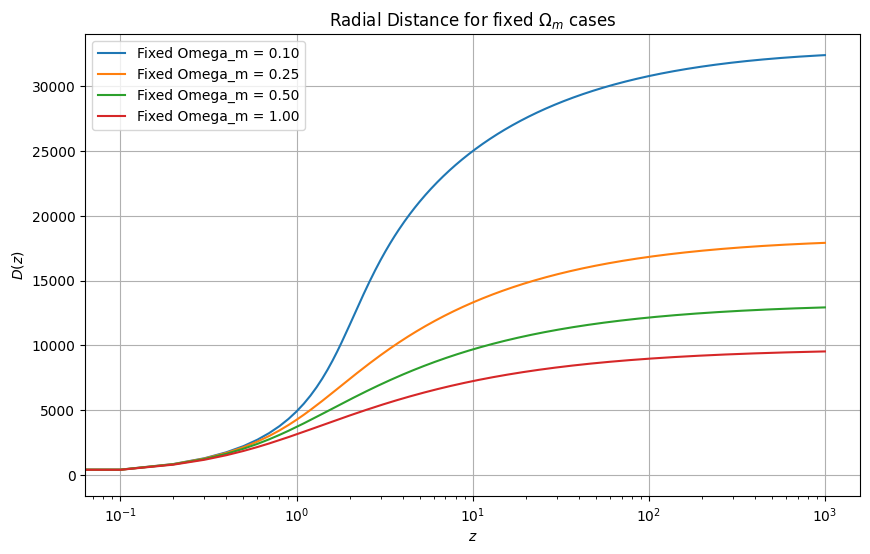

In [67]:
plt.figure(figsize=(10,6))

it = 0
for comp_name, params in c_components.items():
    if 'Fixed Omega_m' in comp_name:
        args = tuple(params.values())
        num_D_z = [D_z(z, args[0], args[1], args[2], args[3], args[4]) for z in z_vals]
        
        plt.semilogx(z_vals, num_D_z, label=f'{comp_name}')
        if it == 3:
            break
        it += 1
        
plt.title(r'Radial Distance for fixed $\Omega_m$ cases')
plt.ylabel(r'$D(z)$')
plt.xlabel(r'$z$')
plt.grid(True)
plt.legend()

plt.savefig('D_z-Omega_m.png', dpi=240)

plt.show()

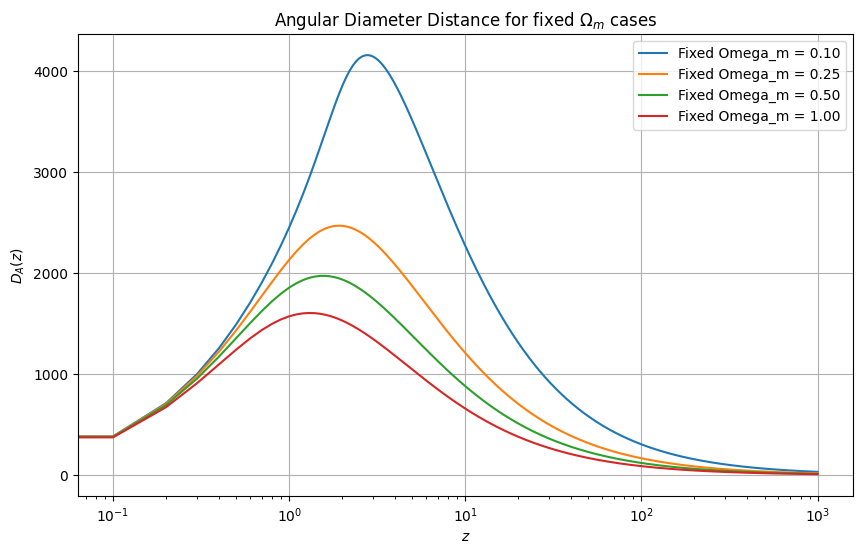

In [68]:
plt.figure(figsize=(10,6))

it = 0
for comp_name, params in c_components.items():
    if 'Fixed Omega_m' in comp_name:
        args = tuple(params.values())
        num_D_A = [D_A(z, args[0], args[1], args[2], args[3], args[4]) for z in z_vals]
        
        plt.semilogx(z_vals, num_D_A, label=f'{comp_name}')
        if it == 3:
            break
        it += 1
        
plt.title(r'Angular Diameter Distance for fixed $\Omega_m$ cases')
plt.ylabel(r'$D_A(z)$')
plt.xlabel(r'$z$')
plt.grid(True)
plt.legend()

plt.savefig('D_A-Omega_m.png', dpi=240)

plt.show()

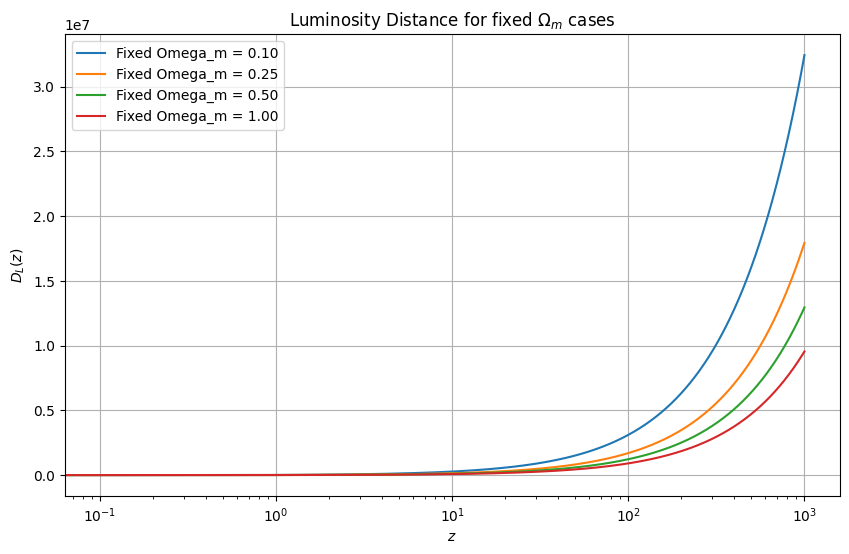

In [69]:
plt.figure(figsize=(10,6))

it = 0
for comp_name, params in c_components.items():
    if 'Fixed Omega_m' in comp_name:
        args = tuple(params.values())
        num_D_L = [D_L(z, args[0], args[1], args[2], args[3], args[4]) for z in z_vals]

        plt.semilogx(z_vals, num_D_L, label=f'{comp_name}')
        if it == 3:
            break
        it += 1
        
plt.title(r'Luminosity Distance for fixed $\Omega_m$ cases')
plt.ylabel(r'$D_L(z)$')
plt.xlabel(r'$z$')
plt.grid(True)
plt.legend()

plt.savefig('D_L-Omega_m.png', dpi=240)

plt.show()

### Fixed $\Omega_{DE}$

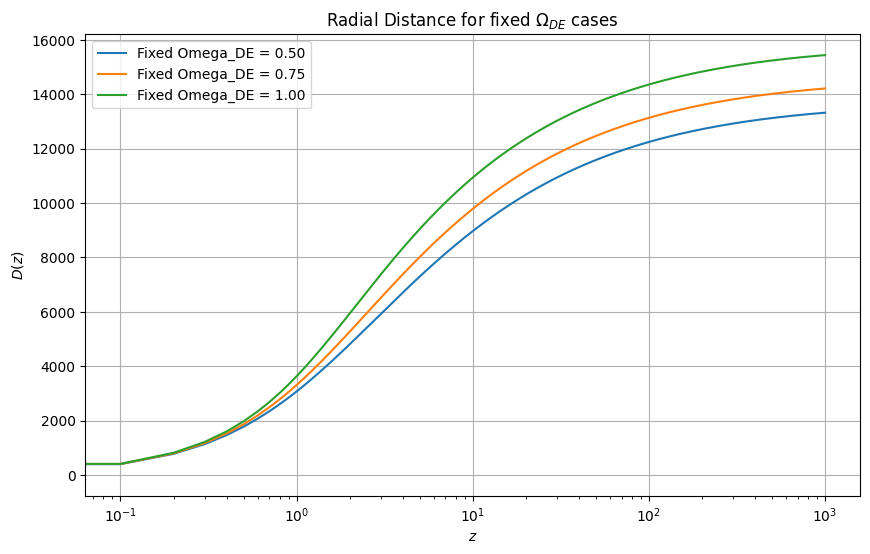

In [70]:
plt.figure(figsize=(10,6))

it = 0
for comp_name, params in c_components.items():
    if 'Fixed Omega_DE' in comp_name:
        args = tuple(params.values())
        num_D_z = [D_z(z, args[0], args[1], args[2], args[3], args[4]) for z in z_vals]
        
        plt.semilogx(z_vals, num_D_z, label=f'{comp_name}')
        if it == 2:
            break
        it += 1
        
plt.title(r'Radial Distance for fixed $\Omega_{DE}$ cases')
plt.ylabel(r'$D(z)$')
plt.xlabel(r'$z$')
plt.grid(True)
plt.legend()

plt.savefig('D_z-Omega_DE.png', dpi=240)

plt.show()

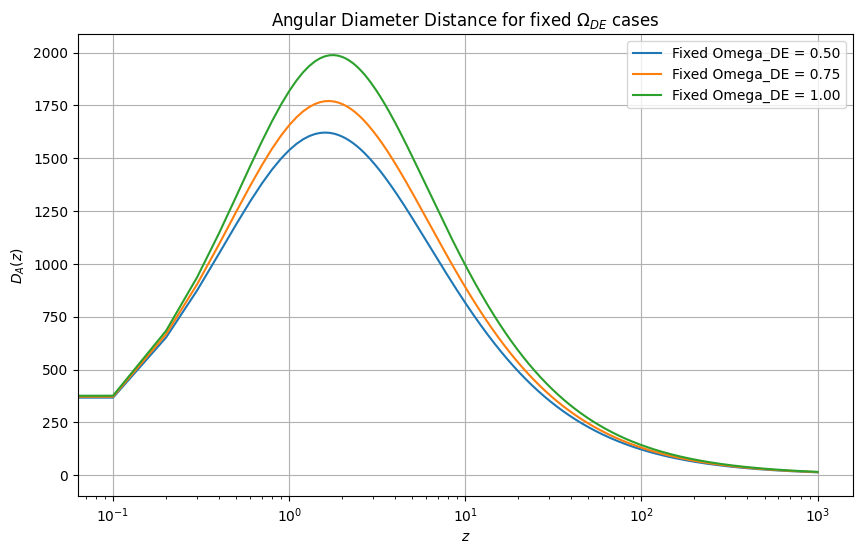

In [71]:
plt.figure(figsize=(10,6))

it = 0
for comp_name, params in c_components.items():
    if 'Fixed Omega_DE' in comp_name:    
        args = tuple(params.values())
        num_D_A = [D_A(z, args[0], args[1], args[2], args[3], args[4]) for z in z_vals]

        plt.semilogx(z_vals, num_D_A, label=f'{comp_name}')
        if it == 2:
            break
        it += 1
        
plt.title(r'Angular Diameter Distance for fixed $\Omega_{DE}$ cases')
plt.ylabel(r'$D_A(z)$')
plt.xlabel(r'$z$')
plt.grid(True)
plt.legend()

plt.savefig('D_A-Omega_DE.png', dpi=240)

plt.show()

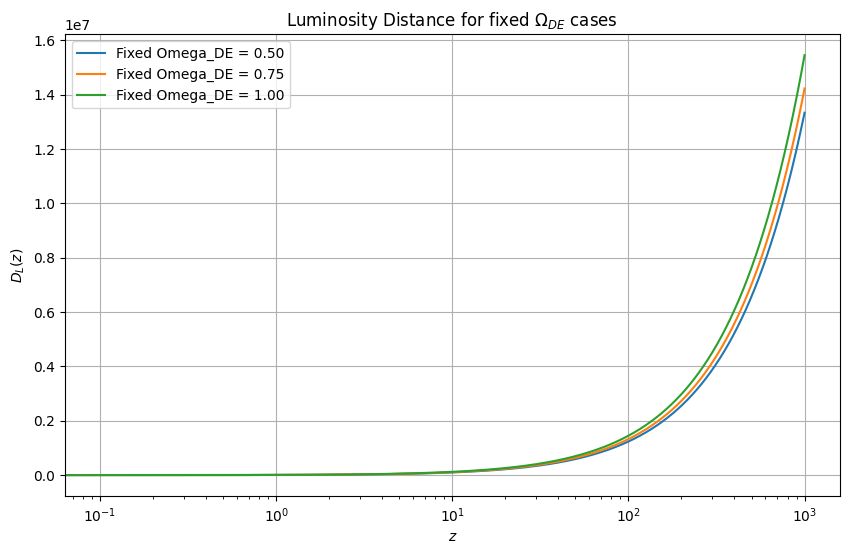

In [72]:
plt.figure(figsize=(10,6))

it = 0
for comp_name, params in c_components.items():
    if 'Fixed Omega_DE' in comp_name:
        args = tuple(params.values())
        num_D_L = [D_L(z, args[0], args[1], args[2], args[3], args[4]) for z in z_vals]
        
        plt.semilogx(z_vals, num_D_L, label=f'{comp_name}')
        if it == 3:
            break
        it += 1
        
plt.title(r'Luminosity Distance for fixed $\Omega_{DE}$ cases')
plt.ylabel(r'$D_L(z)$')
plt.xlabel(r'$z$')
plt.grid(True)
plt.legend()

plt.savefig('D_L-Omega_DE.png', dpi=240)

plt.show()

### Fixed $w$

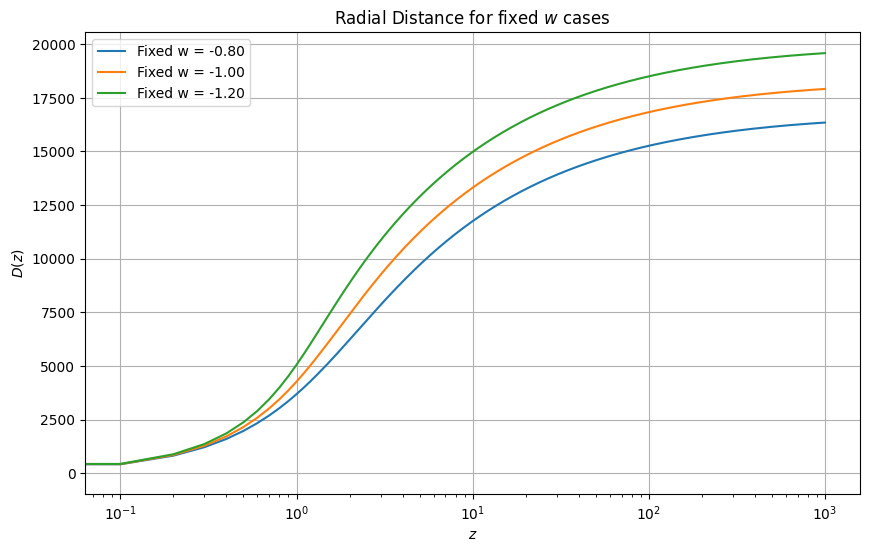

In [73]:
plt.figure(figsize=(10,6))

it = 0
for comp_name, params in c_components.items():
    if 'Fixed w' in comp_name:
        args = tuple(params.values())
        num_D_z = [D_z(z, args[0], args[1], args[2], args[3], args[4]) for z in z_vals]
        
        plt.semilogx(z_vals, num_D_z, label=f'{comp_name}')
        if it == 2:
            break
        it += 1
        
plt.title(r'Radial Distance for fixed $w$ cases')
plt.ylabel(r'$D(z)$')
plt.xlabel(r'$z$')
plt.grid(True)
plt.legend()

plt.savefig('D_z-w.png', dpi=240)

plt.show()

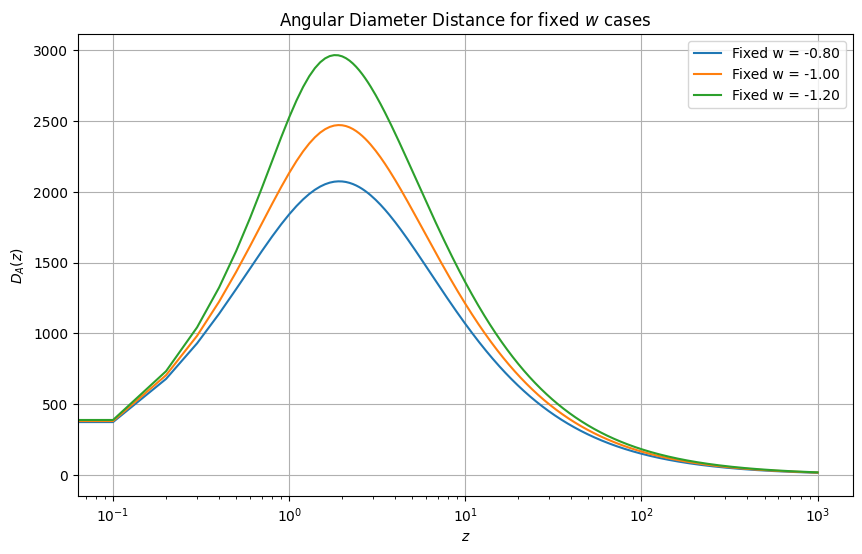

In [74]:
plt.figure(figsize=(10,6))

it = 0
for comp_name, params in c_components.items():
    if 'Fixed w' in comp_name:    
        args = tuple(params.values())
        num_D_A = [D_A(z, args[0], args[1], args[2], args[3], args[4]) for z in z_vals]

        plt.semilogx(z_vals, num_D_A, label=f'{comp_name}')
        if it == 2:
            break
        it += 1
        
plt.title(r'Angular Diameter Distance for fixed $w$ cases')
plt.ylabel(r'$D_A(z)$')
plt.xlabel(r'$z$')
plt.grid(True)
plt.legend()

plt.savefig('D_A-w.png', dpi=240)

plt.show()

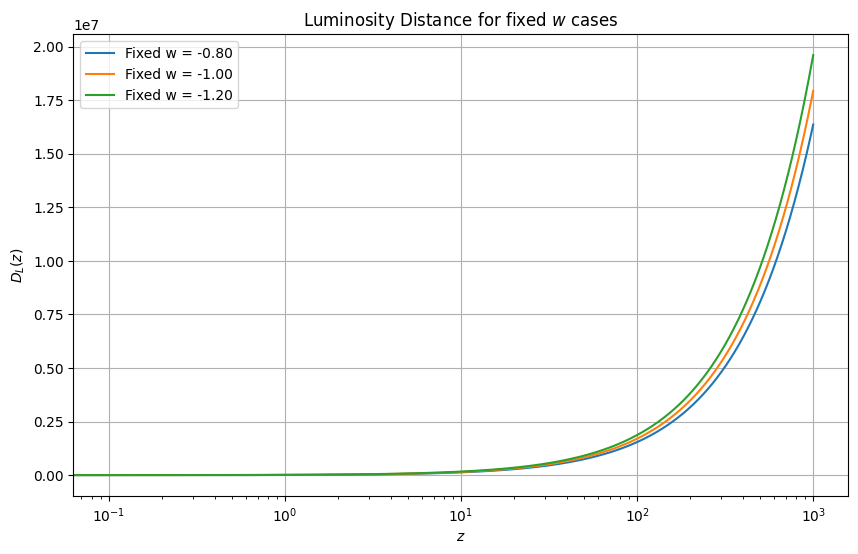

In [75]:
plt.figure(figsize=(10,6))

it = 0
for comp_name, params in c_components.items():
    if 'Fixed w' in comp_name:
        args = tuple(params.values())
        num_D_L = [D_L(z, args[0], args[1], args[2], args[3], args[4]) for z in z_vals]
        
        plt.semilogx(z_vals, num_D_L, label=f'{comp_name}')
        if it == 3:
            break
        it += 1
        
plt.title(r'Luminosity Distance for fixed $w$ cases')
plt.ylabel(r'$D_L(z)$')
plt.xlabel(r'$z$')
plt.grid(True)
plt.legend()

plt.savefig('D_L-w.png', dpi=240)

plt.show()

### Fixed $\Omega_r$

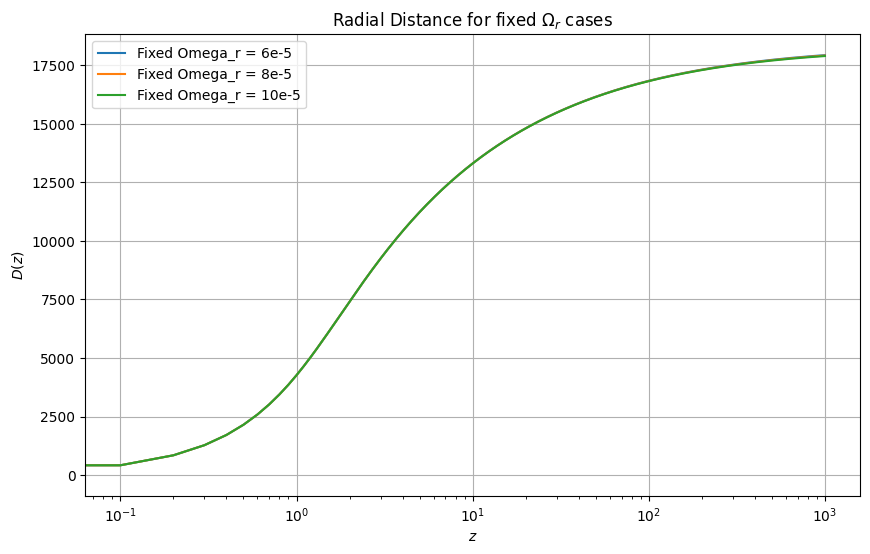

In [76]:
plt.figure(figsize=(10,6))

it = 0
for comp_name, params in c_components.items():
    if 'Fixed Omega_r' in comp_name:
        args = tuple(params.values())
        num_D_z = [D_z(z, args[0], args[1], args[2], args[3], args[4]) for z in z_vals]
        
        plt.semilogx(z_vals, num_D_z, label=f'{comp_name}')
        if it == 2:
            break
        it += 1
        
plt.title(r'Radial Distance for fixed $\Omega_{r}$ cases')
plt.ylabel(r'$D(z)$')
plt.xlabel(r'$z$')
plt.grid(True)
plt.legend()

plt.savefig('D_z-Omega_r.png', dpi=240)

plt.show()

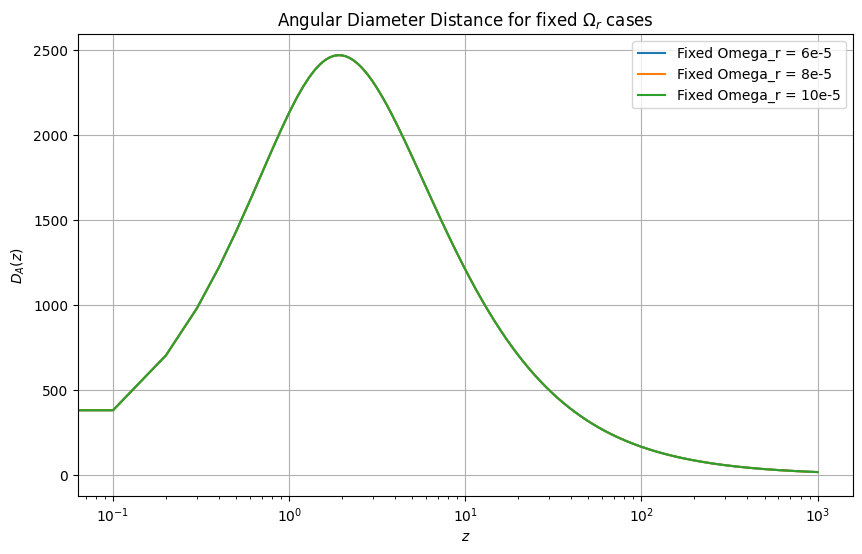

In [77]:
plt.figure(figsize=(10,6))

it = 0
for comp_name, params in c_components.items():
    if 'Fixed Omega_r' in comp_name:    
        args = tuple(params.values())
        num_D_A = [D_A(z, args[0], args[1], args[2], args[3], args[4]) for z in z_vals]

        plt.semilogx(z_vals, num_D_A, label=f'{comp_name}')
        if it == 2:
            break
        it += 1
        
plt.title(r'Angular Diameter Distance for fixed $\Omega_{r}$ cases')
plt.ylabel(r'$D_A(z)$')
plt.xlabel(r'$z$')
plt.grid(True)
plt.legend()

plt.savefig('D_A-Omega_r.png', dpi=240)

plt.show()

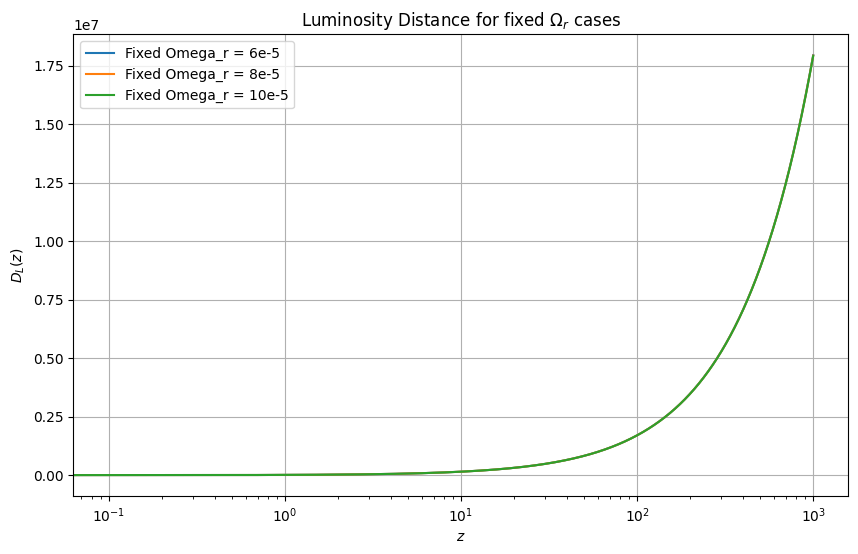

In [78]:
plt.figure(figsize=(10,6))

it = 0
for comp_name, params in c_components.items():
    if 'Fixed Omega_r' in comp_name:
        args = tuple(params.values())
        num_D_L = [D_L(z, args[0], args[1], args[2], args[3], args[4]) for z in z_vals]
        
        plt.semilogx(z_vals, num_D_L, label=f'{comp_name}')
        if it == 3:
            break
        it += 1
        
plt.title(r'Luminosity Distance for fixed $\Omega_{r}$ cases')
plt.ylabel(r'$D_L(z)$')
plt.xlabel(r'$z$')
plt.grid(True)
plt.legend()

plt.savefig('D_L-Omega_r.png', dpi=240)

plt.show()

### Flat cases

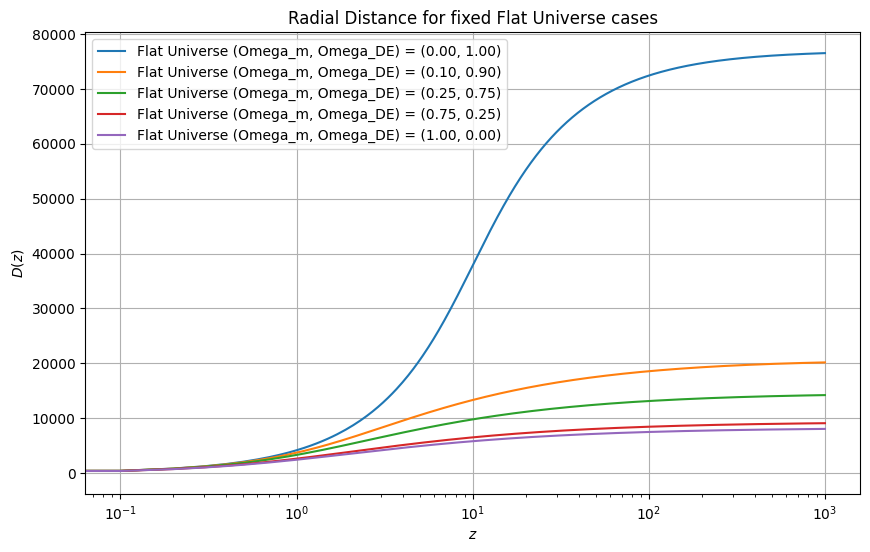

In [79]:
plt.figure(figsize=(10,6))

it = 0
for comp_name, params in c_components.items():
    if 'Flat Universe' in comp_name:
        args = tuple(params.values())
        num_D_z = [D_z(z, args[0], args[1], args[2], args[3], args[4]) for z in z_vals]
        
        plt.semilogx(z_vals, num_D_z, label=f'{comp_name}')
        if it == 4:
            break
        it += 1
        
plt.title(r'Radial Distance for fixed Flat Universe cases')
plt.ylabel(r'$D(z)$')
plt.xlabel(r'$z$')
plt.grid(True)
plt.legend()

plt.savefig('D_z-flat.png', dpi=240)

plt.show()

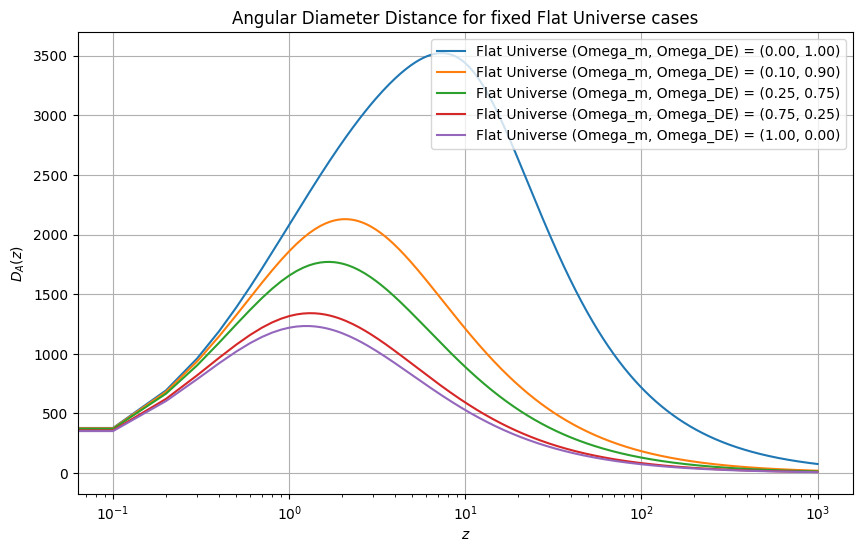

In [81]:
plt.figure(figsize=(10,6))

it = 0
for comp_name, params in c_components.items():
    if 'Flat Universe' in comp_name:    
        args = tuple(params.values())
        num_D_A = [D_A(z, args[0], args[1], args[2], args[3], args[4]) for z in z_vals]

        plt.semilogx(z_vals, num_D_A, label=f'{comp_name}')
        if it == 4:
            break
        it += 1
        
plt.title(r'Angular Diameter Distance for fixed Flat Universe cases')
plt.ylabel(r'$D_A(z)$')
plt.xlabel(r'$z$')
plt.grid(True)
plt.legend()

plt.savefig('D_A-flat.png', dpi=240)

plt.show()

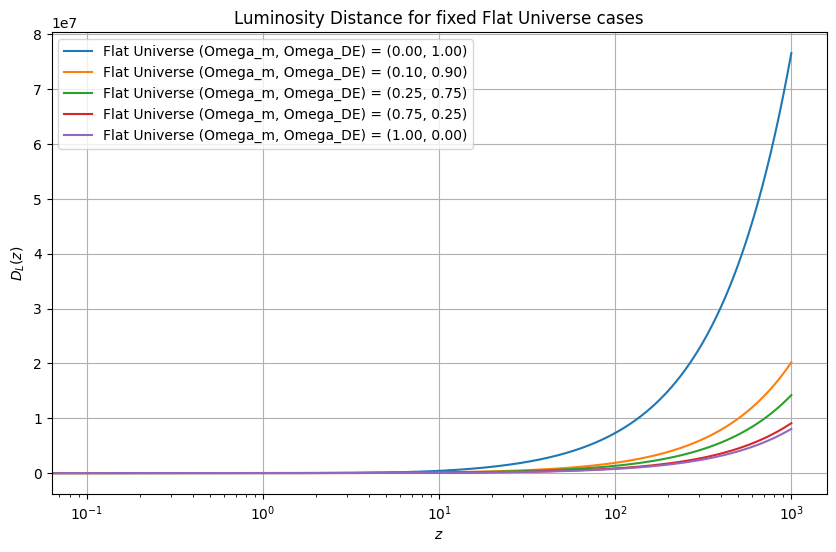

In [82]:
plt.figure(figsize=(10,6))

it = 0
for comp_name, params in c_components.items():
    if 'Flat Universe' in comp_name:
        args = tuple(params.values())
        num_D_L = [D_L(z, args[0], args[1], args[2], args[3], args[4]) for z in z_vals]
        
        plt.semilogx(z_vals, num_D_L, label=f'{comp_name}')
        if it == 4:
            break
        it += 1
        
plt.title(r'Luminosity Distance for fixed Flat Universe cases')
plt.ylabel(r'$D_L(z)$')
plt.xlabel(r'$z$')
plt.grid(True)
plt.legend()

plt.savefig('D_L-flat.png', dpi=240)

plt.show()